# **Principal Component Analysis on company data**
## ECE 204 Data Science & Engineering

In [2]:
# Pandas and NumPy to deal with data
import pandas as pd
import numpy as np

# Import the required module from sklearn to perform PCA
from sklearn.decomposition import PCA

Let's read the dataset `companies.csv` and analyze it

In [3]:
df = pd.read_csv("companies.csv")
df.head()

,employees,revenue_usd
0,554.0,1443509.0
1,1401.0,3378243.0
2,1411.0,3300592.0
3,1415.0,3448365.0
4,825.0,1984168.0


Let's visualize both of these columns

(np.float64(38.8),
 np.float64(2573.2),
 np.float64(-83177.40000000002),
 np.float64(6236639.4))

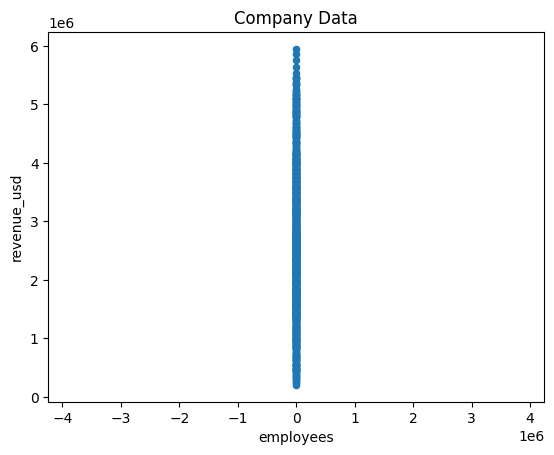

In [4]:
# we'll use column INDEX (0 and 1) instead of names ("employees" and "revenue_usd") because it's shorter to type!
ax = df.plot.scatter(x=0,y=1, title="Company Data")

# What about the scale?
ax.axis('equal')

We can see from these data that the revenue of a company is strongly related to the number of employees the company has. <br> Revenue tends to increase as the number of employees increases.

## Data Standardization

In [5]:
# Import the required module from sklearn for data standardization
from sklearn.preprocessing import StandardScaler

# StandardScaler is used for data standardization
scaler = StandardScaler()

# We define a StandardScaler and then we fit it to our data
scaler.fit(df)

# After running the fit method, the normalize object will have the attributes mean_ (the mean) and scale_ (the standard deviation)
print("Mean of the data is:", scaler.mean_)
print("Standard Deviation of the data is:", scaler.scale_)

Mean of the data is: [1.1071506e+03 2.6392633e+06]
Standard Deviation of the data is: [5.02513947e+02 1.21773397e+06]


In [6]:
# Now we can standardize the data using the transform method.
numpy_scaled = scaler.transform(df)

# .transform returns a NumPy array, which we then convert into a Pandas DataFrame.
df_scaled = pd.DataFrame(numpy_scaled, columns=["employees_scaled","revenue_usd_scaled"])
df_scaled.head()

,employees_scaled,revenue_usd_scaled
0,-1.100767,-0.981950
1,0.584759,0.606848
2,0.604659,0.543081
3,0.612619,0.664432
4,-0.561478,-0.537963


In [7]:
# New mean and standard deviation
print("Mean of the data is:", df_scaled.mean().values.round(2))
print("Standard Deviation of the data is:", df_scaled.std().values.round(2))

Mean of the data is: [-0. -0.]
Standard Deviation of the data is: [1. 1.]


Now, let's visualize the normalized data

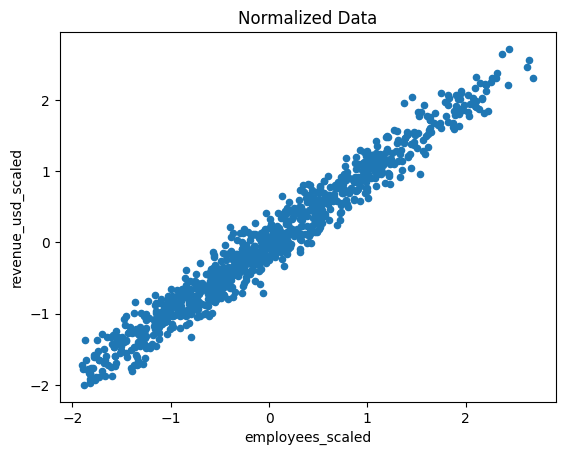

In [8]:
ax = df_scaled.plot.scatter(x=0, y=1, title="Normalized Data");
#ax.axis('equal')


#### Let's run `PCA` to reduce this 2D dataset to a 1D dataset.

In [9]:
pca = PCA(n_components=1) # reduce it to 1D (this is all we can really do, since the original data is only 2D)
pca.fit(df_scaled);
data_pca = pca.transform(df_scaled)

print("The original data has shape", df.shape )
print("The transformed data has shape", data_pca.shape )

The original data has shape (923, 2)
The transformed data has shape (923, 1)


In [10]:
pca.components_

array([[0.70710678, 0.70710678]])

#### Let's take our reduced data and perform the inverse transformation to see what was lost in the reduction.

In [11]:
data_inv = pca.inverse_transform(data_pca)
print("The inverse transformed data has shape", data_inv.shape)

# Convert the inverse transformed data into a dataframe
df_scaled_inv = pd.DataFrame(data_inv, columns=df_scaled.columns)

The inverse transformed data has shape (923, 2)


#### We now visualize the original and the PCA projected data to see how well PCA performed

**Aside:** Here we plot two plots on top of each other. This is done by making the axes of the two plots same. We get the axis of the first plot `ax1` and make it same as the axis of the second plot using `ax=ax1`. 

**Aside:** The `alpha` argument makes the plot transparent. We can see that the first plot is lighter and the second is much darker as we have passed `alpha=.2` for the first plot and `alpha=1` for the second plot

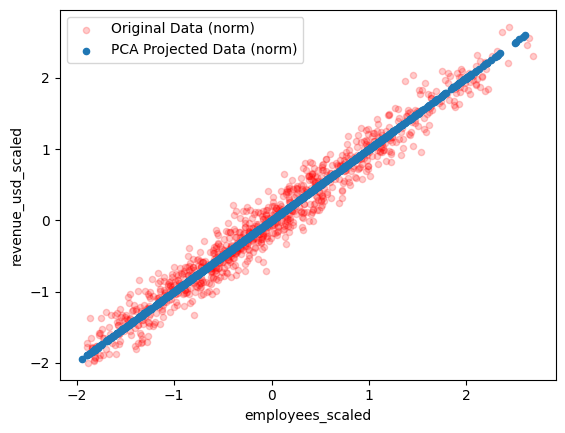

In [12]:
ax1 = df_scaled.plot.scatter(x=0, y=1, alpha=.2, color='r', label="Original Data (norm)")
df_scaled_inv.plot.scatter(x=0, y=1, alpha=1, ax=ax1, label="PCA Projected Data (norm)");

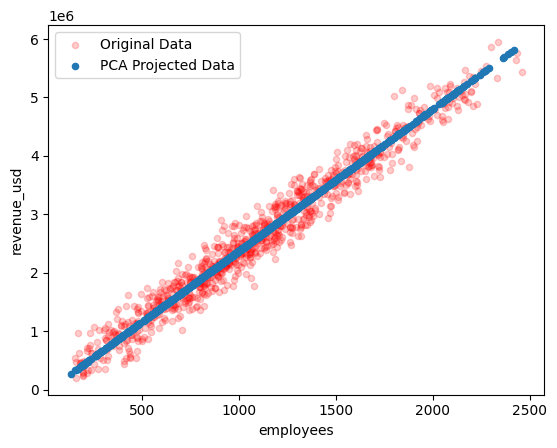

In [13]:
# to return to the original coordinates, use the "inverse transform" from our standardization
df_inv = pd.DataFrame(scaler.inverse_transform(df_scaled_inv), columns=df.columns) 

ax2 = df.plot.scatter(x=0, y=1, alpha=.2, color='r', label="Original Data")
df_inv.plot.scatter(x=0, y=1, alpha=1, ax=ax2, label="PCA Projected Data");

We can see from the above plot, PCA "flattened" the 2D dataset into a 1D dataset. The information along the least important principal axis is removed, leaving only the component of the data with the highest variance.

#### How much of the variance is explained by using just one component?

In [14]:
pca.explained_variance_ratio_

array([0.99035046])